In [1]:
# Imports
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load the data
data = pd.read_excel(r'C:\Users\Kavya\OneDrive\Documents\DSA_internship\influencer_data.xlsx')

In [3]:
data.head(10)

,channelId,title,description,publishedAt,subscriberCount,viewCount,videoCount,accountAgeDays,avgLikes,avgComments,EngagementRate,PostFrequency,query
0,UCR6H7VWfgscnYHpRAMLWbKA,Farming Tech Mayur Patel,@FarmingTechMayurPatel \n#FarmingTech\n➡️खेतीब...,2017-01-01T10:14:18Z,429000.0,3.588117e+07,343.0,3218.0,252.0,21.0,0.0006,0.106588,tech influencer
1,UCeoRAN5sr02w8_9aFWxIM4g,Tech Travel Eat by Sujith Bhakthan,"Traveler, Influencer & Food Lover\nContact: ad...",2016-08-01T16:13:49Z,2300000.0,8.032195e+08,2454.0,3371.0,2695.0,245.0,0.0013,0.727974,tech influencer
2,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,Let's become the Greatest Tech Community on th...,2011-04-20T12:10:24Z,21800000.0,7.830277e+09,1852.0,5301.0,61953.0,1802.0,0.0029,0.349368,tech influencer
3,UCJ7c1q_0KXilw_jgkeLG8pg,Techbrokannada,"Technology, Smartphone Reviews , Unboxing Gadg...",2019-04-05T13:35:11Z,117000.0,1.254144e+07,1553.0,2394.0,663.0,27.0,0.0059,0.648705,tech influencer
4,UC9XWJ3iy4FO6_hQbgGFPcfg,Mau Lozano Tech,"Smartphones, Unboxings, AI, Gadgets \n📍Califor...",2021-10-08T06:36:08.402086Z,555000.0,2.373259e+08,1312.0,1484.0,1340.0,21.0,0.0025,0.884097,tech influencer
5,UCXUJJNoP1QupwsYIWFXmsZg,Tech Burner,Subscribe 🔥,2014-09-26T18:24:03Z,12500000.0,2.421880e+09,1525.0,4053.0,61960.0,1283.0,0.0051,0.376264,tech influencer
6,UCBW8ENk_9sp13G42hNly_sg,Tech Influence,"I’m Andy, a Tech Influencer #ShareASale",2011-09-30T22:44:36Z,16500.0,1.120870e+07,3202.0,5145.0,159.0,24.0,0.0111,0.622352,tech influencer
7,UCV0qA-eDDICsRR9rPcnG7tw,Joma Tech,I talk about life in Silicon Valley and at big...,2016-08-31T22:22:07Z,2350000.0,1.933625e+08,89.0,3348.0,94881.0,2577.0,0.0415,0.026583,tech influencer
8,UCggXQcy57bwxUeZI1LB8DCw,Tech Is The New Black,We are the #1 tech business and tech career vi...,2010-03-09T19:56:56Z,160000.0,1.190466e+07,1402.0,5715.0,10.0,0.0,0.0001,0.245319,tech influencer
9,UCS261lQDXjMvc8Jck-2CQEg,Gyan Therapy,We present tech products in simple & easy-to-u...,2018-08-05T18:58:33Z,3960000.0,1.292643e+09,1568.0,2644.0,102778.0,2049.0,0.0265,0.593041,tech influencer


In [4]:
data.shape

(4669, 13)

In [5]:
data.columns.tolist()

['channelId',
 'title',
 'description',
 'publishedAt',
 'subscriberCount',
 'viewCount',
 'videoCount',
 'accountAgeDays',
 'avgLikes',
 'avgComments',
 'EngagementRate',
 'PostFrequency',
 'query']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   channelId        4666 non-null   object 
 1   title            4666 non-null   object 
 2   description      4597 non-null   object 
 3   publishedAt      4666 non-null   object 
 4   subscriberCount  4666 non-null   float64
 5   viewCount        4666 non-null   float64
 6   videoCount       4666 non-null   float64
 7   accountAgeDays   4666 non-null   float64
 8   avgLikes         4666 non-null   float64
 9   avgComments      4666 non-null   float64
 10  EngagementRate   4666 non-null   float64
 11  PostFrequency    4664 non-null   float64
 12  query            4669 non-null   object 
dtypes: float64(8), object(5)
memory usage: 474.3+ KB


In [7]:
data.describe()

,subscriberCount,viewCount,videoCount,accountAgeDays,avgLikes,avgComments,EngagementRate,PostFrequency
count,4.666000e+03,4.666000e+03,4666.000000,4666.000000,4.666000e+03,4666.000000,4666.000000,4664.000000
mean,2.103459e+06,6.549217e+08,836.991856,3184.831355,1.578179e+04,692.923489,0.017302,0.736093
std,1.248029e+07,3.222242e+09,2166.902626,1645.034213,9.407777e+04,6171.526334,0.198510,27.690878
min,5.000000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.142500e+04,2.886840e+06,186.000000,1919.250000,3.200000e+01,2.000000,0.000700,0.069727
50%,1.590000e+05,2.641071e+07,435.000000,3128.500000,4.020000e+02,23.000000,0.003000,0.160091
75%,1.140000e+06,2.365878e+08,946.000000,4415.000000,3.548500e+03,161.000000,0.010500,0.348184
max,4.480000e+08,9.885257e+10,61366.000000,7311.000000,2.102047e+06,202771.000000,8.928600,1890.588235


In [8]:
# Checking for null values
data.isnull().sum()

channelId           3
title               3
description        72
publishedAt         3
subscriberCount     3
viewCount           3
videoCount          3
accountAgeDays      3
avgLikes            3
avgComments         3
EngagementRate      3
PostFrequency       5
query               0
dtype: int64

In [9]:
# Removing null values, duplicates, unecessary features
data = data.drop_duplicates()
data = data.dropna()
data = data.drop(['channelId', 'description', 'publishedAt'], axis=1)

In [10]:
data.head(5)

,title,subscriberCount,viewCount,videoCount,accountAgeDays,avgLikes,avgComments,EngagementRate,PostFrequency,query
0,Farming Tech Mayur Patel,429000.0,3.588117e+07,343.0,3218.0,252.0,21.0,0.0006,0.106588,tech influencer
1,Tech Travel Eat by Sujith Bhakthan,2300000.0,8.032195e+08,2454.0,3371.0,2695.0,245.0,0.0013,0.727974,tech influencer
2,Mrwhosetheboss,21800000.0,7.830277e+09,1852.0,5301.0,61953.0,1802.0,0.0029,0.349368,tech influencer
3,Techbrokannada,117000.0,1.254144e+07,1553.0,2394.0,663.0,27.0,0.0059,0.648705,tech influencer
4,Mau Lozano Tech,555000.0,2.373259e+08,1312.0,1484.0,1340.0,21.0,0.0025,0.884097,tech influencer


In [11]:
data.shape

(3498, 10)

In [12]:
data.isnull().sum()

title              0
subscriberCount    0
viewCount          0
videoCount         0
accountAgeDays     0
avgLikes           0
avgComments        0
EngagementRate     0
PostFrequency      0
query              0
dtype: int64

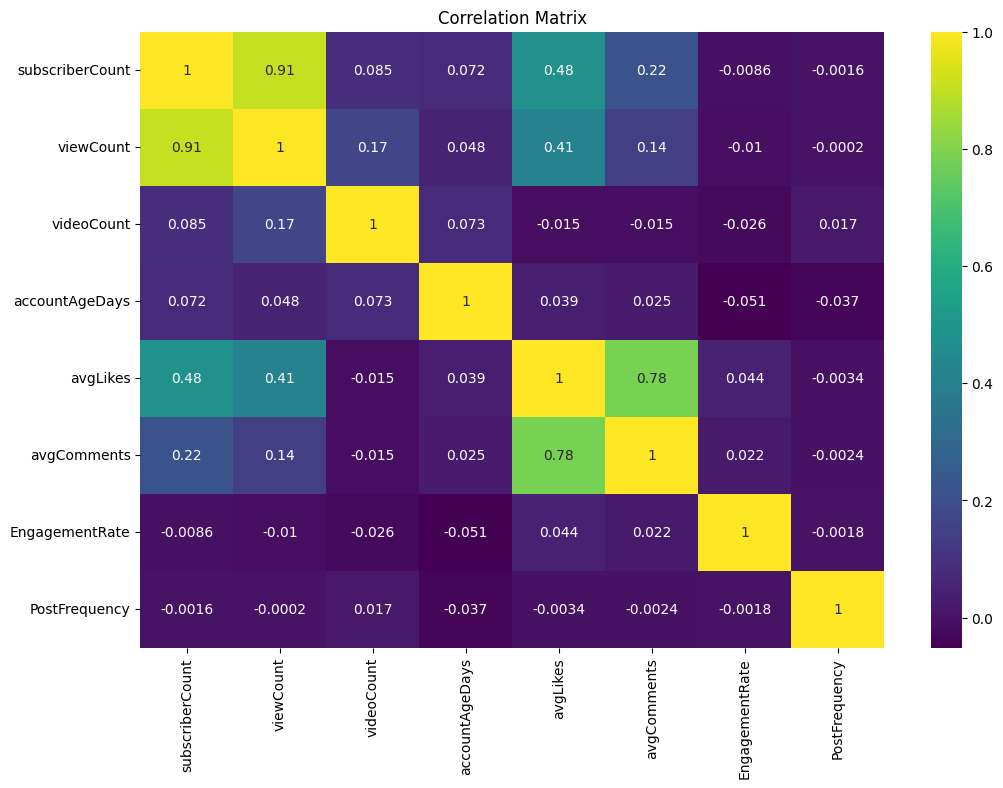

In [13]:
# Correlation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

In [14]:

num_data = data.select_dtypes(include = "number")
cat_data = data.select_dtypes(include = "object")

# Identify categorical and numerical columns
num_cols = num_data.columns.tolist()
cat_cols = cat_data.columns.tolist()

print("numerical columns: ", num_cols)
print("categorical columns: ",cat_cols)

numerical columns:  ['subscriberCount', 'viewCount', 'videoCount', 'accountAgeDays', 'avgLikes', 'avgComments', 'EngagementRate', 'PostFrequency']
categorical columns:  ['title', 'query']


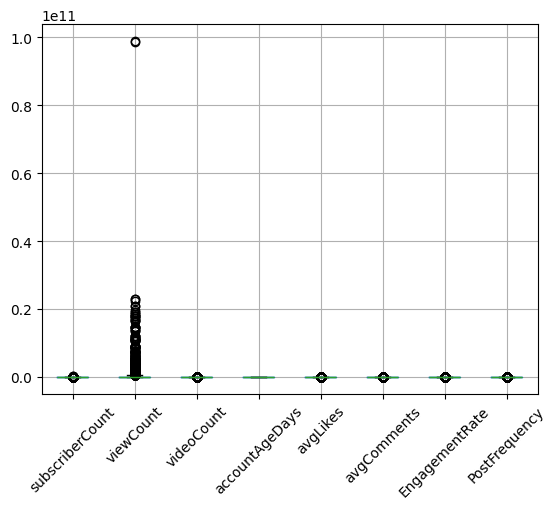

In [15]:
# Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).
num_data.boxplot()
plt.xticks(rotation=45)
plt.show()

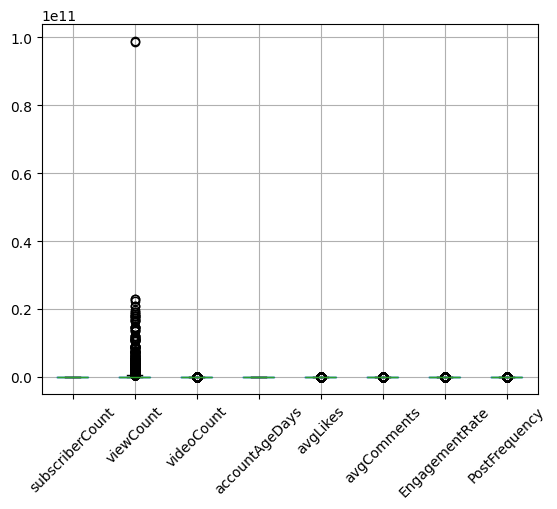

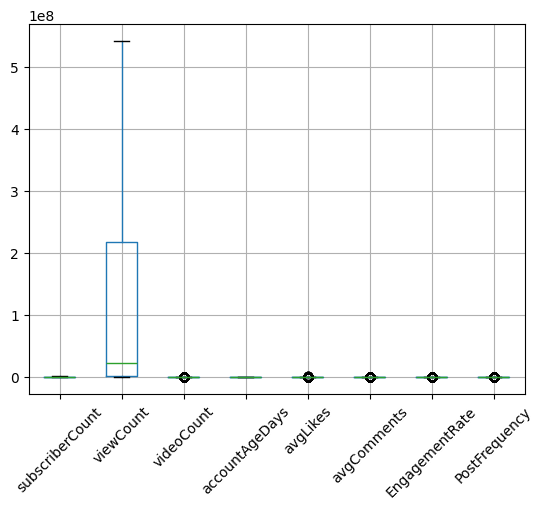

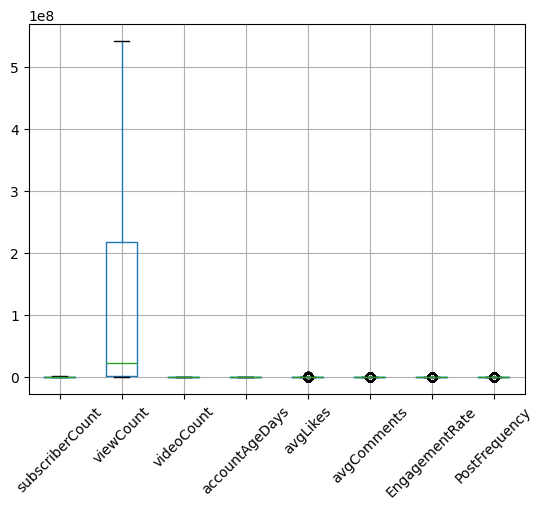

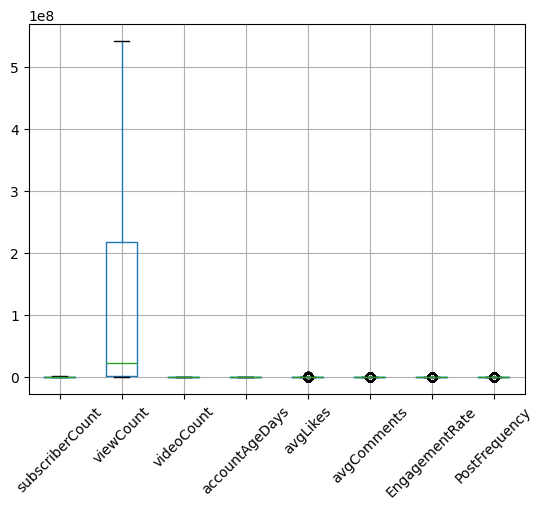

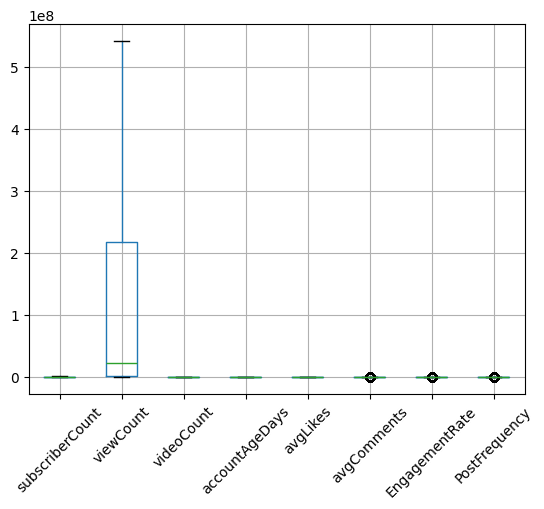

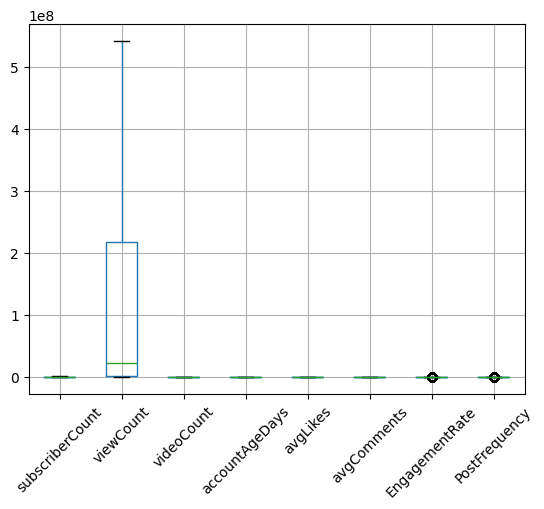

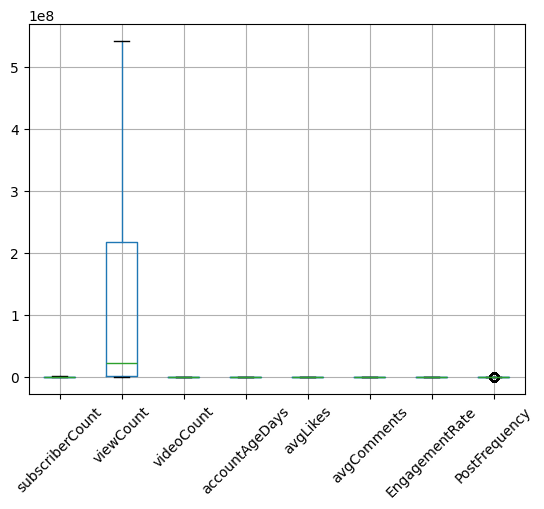

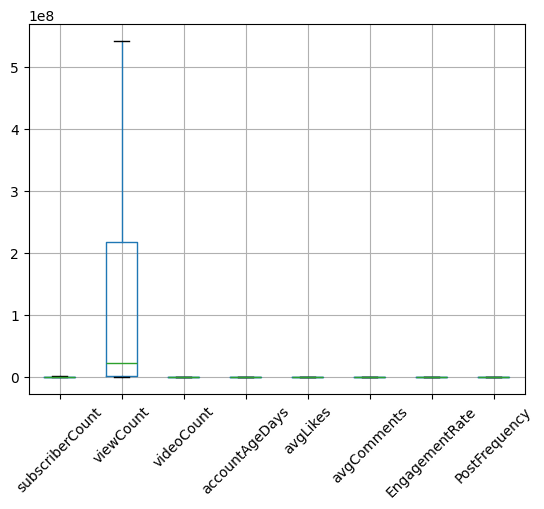

In [16]:
# Remove outliers from these features if they are not representative of typical house prices.

def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[column_name] = data[column_name].clip(upper = upper_bound)
    data[column_name] = data[column_name].clip(lower = lower_bound)
    return data[column_name]




for col in num_cols:
      num_data[col] = remove_outliers(num_data, col)
      num_data.boxplot()
      plt.xticks(rotation=45)
      plt.show()

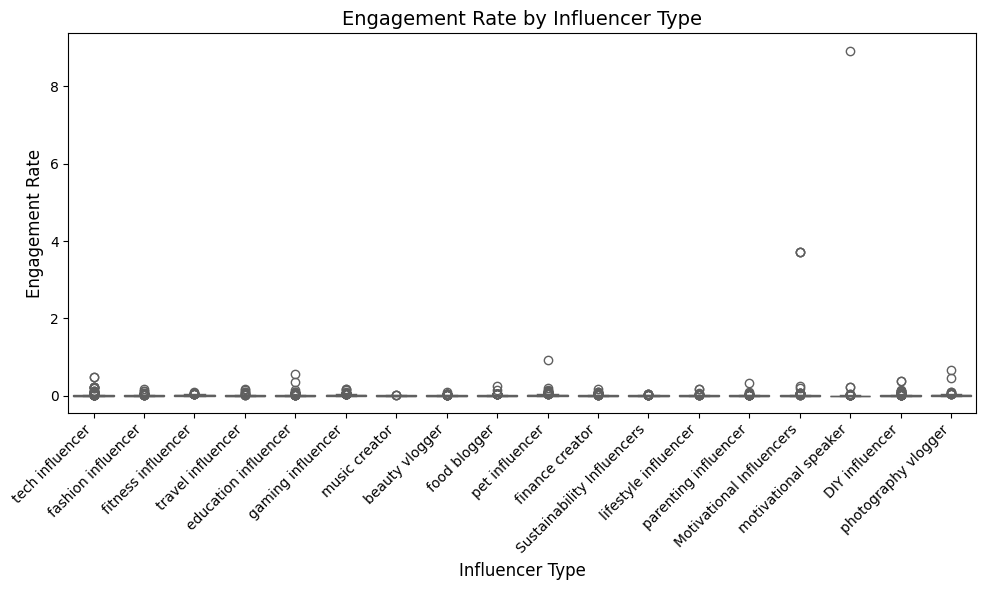

In [17]:
# Distribution of Engagement Rate across different influencer types
plt.figure(figsize=(10,6))
sns.boxplot(
    x='query', 
    y='EngagementRate', 
    hue='query', 
    data=data, 
    palette='Set3', 
    legend=False
)

plt.title('Engagement Rate by Influencer Type', fontsize=14)
plt.xlabel('Influencer Type', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

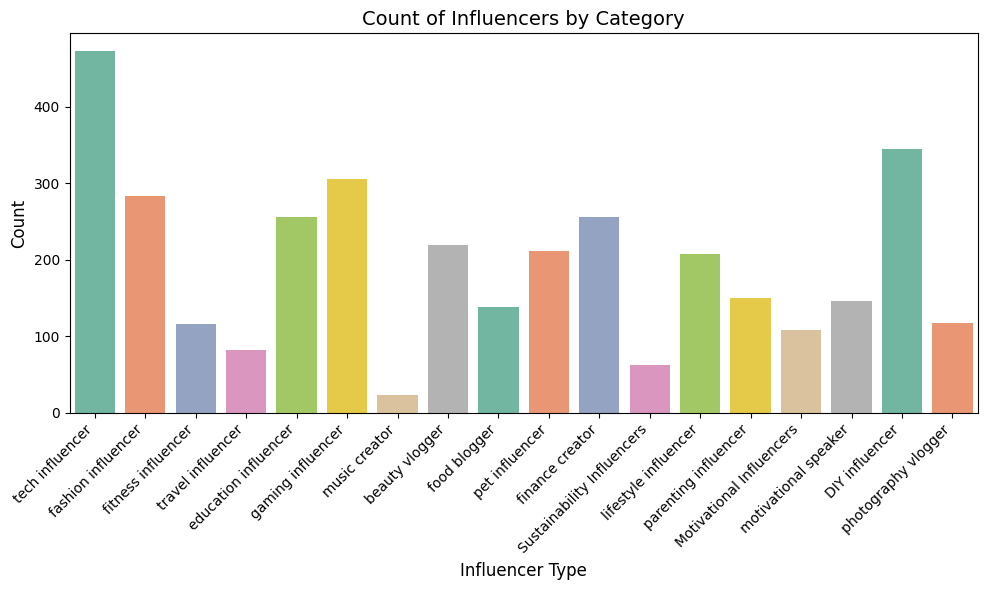

In [18]:
# Distribution of influencer counts across different categories
plt.figure(figsize=(10,6))
sns.countplot(x='query', hue='query', data=data, palette='Set2', legend=False)

plt.title('Count of Influencers by Category', fontsize=14)
plt.xlabel('Influencer Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 🔄 Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')  # or rotation=60 for steeper angle

plt.tight_layout()
plt.show()

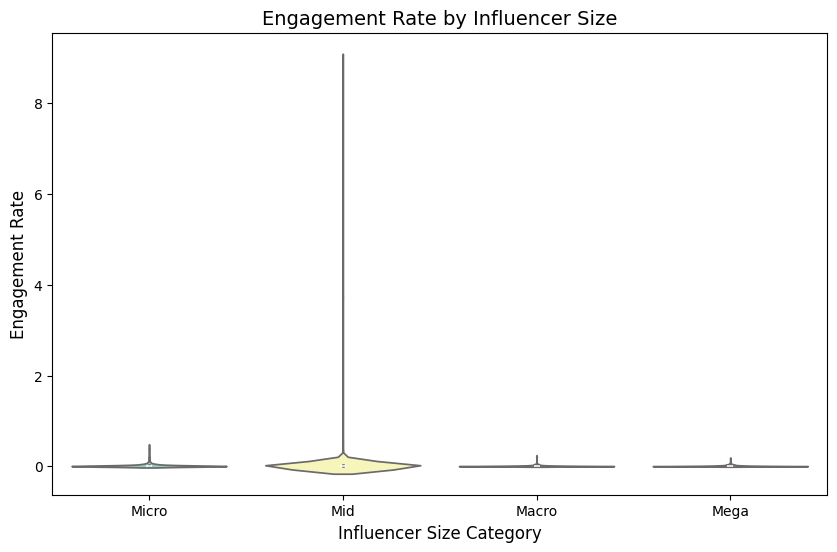

In [19]:
# Engagement Rate distribution across influencer size categories.
subgroup = pd.cut(
    data['subscriberCount'],
    bins=[0, 10000, 100000, 1000000, 10000000],
    labels=['Micro', 'Mid', 'Macro', 'Mega']
)

plt.figure(figsize=(10,6))
sns.violinplot(
    x=subgroup,          # use the temporary variable
    y=data['EngagementRate'],
    palette='Set3',
    hue=subgroup,
    legend=False
)

plt.title('Engagement Rate by Influencer Size', fontsize=14)
plt.xlabel('Influencer Size Category', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.show()


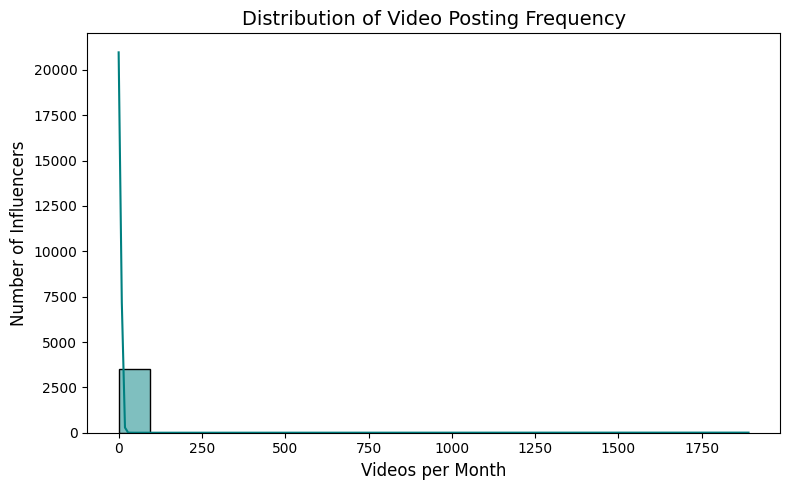

In [20]:
# Distribution of influencers’ video posting frequency
plt.figure(figsize=(8,5))
sns.histplot(data['PostFrequency'], bins=20, kde=True, color='teal')

plt.title('Distribution of Video Posting Frequency', fontsize=14)
plt.xlabel('Videos per Month', fontsize=12)
plt.ylabel('Number of Influencers', fontsize=12)
plt.tight_layout()
plt.show()


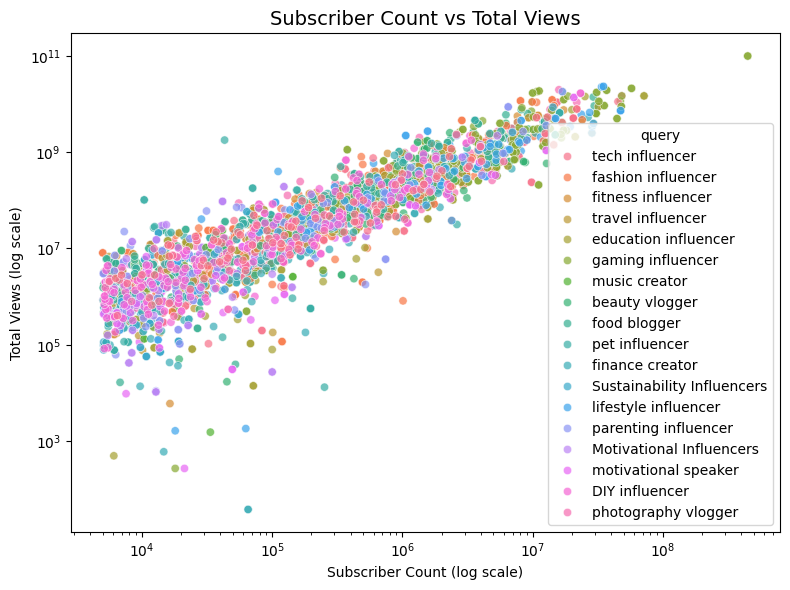

In [21]:
# Relationship between subscriber count and total views across different influencer categories.
plt.figure(figsize=(8,6))
sns.scatterplot(x='subscriberCount', y='viewCount', hue='query', data=data, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Subscriber Count vs Total Views', fontsize=14)
plt.xlabel('Subscriber Count (log scale)')
plt.ylabel('Total Views (log scale)')
plt.tight_layout()
plt.show()


In [23]:
# Encoding
cat_cols = ['query']  
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [24]:
# Engagement per 1000 subscribers
data['engagement_per_sub'] = (data['avgLikes'] + data['avgComments']) / (data['subscriberCount'] / 1000)

# Views per subscriber (audience reach efficiency)
data['views_per_sub'] = data['viewCount'] / data['subscriberCount']

# Base popularity = combination of organic reach & engagement
data['popularity_score'] = (
    0.6 * data['views_per_sub'].rank(pct=True) +
    0.4 * data['engagement_per_sub'].rank(pct=True)
) * 9 + 1


print("✅ Popularity scores (1–10) added successfully!")
print(data['popularity_score'].describe())

✅ Popularity scores (1–10) added successfully!
count    3498.000000
mean        5.501286
std         1.961636
min         1.141767
25%         4.044254
50%         5.532419
75%         6.946741
max         9.995883
Name: popularity_score, dtype: float64


In [25]:
features = [
    'subscriberCount',
    'viewCount',
    'videoCount',
    'avgLikes',
    'avgComments',
    'EngagementRate',
    'PostFrequency',
    'accountAgeDays'
]
X = data[features]
y = data['popularity_score']


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [28]:
# 4️⃣ Define models
# --------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)



    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R²": round(r2, 4),
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2)
    })

results_df = pd.DataFrame(results)
print("\n📈 Model Comparison Results:")
print(results_df.sort_values("R²", ascending=False))


📈 Model Comparison Results:
               Model      R²  RMSE   MAE
4  Gradient Boosting  0.9837  0.26  0.20
3      Random Forest  0.9704  0.34  0.24
0  Linear Regression  0.0781  1.92  1.56
2   Lasso Regression  0.0717  1.93  1.57
1   Ridge Regression  0.0509  1.95  1.59


In [29]:
# --- Step 1: Define base model ---
gbr = GradientBoostingRegressor(random_state=42)

# --- Step 2: Define parameter grid ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

# --- Step 3: Define CV setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Step 4: Run GridSearchCV (with built-in CV) ---
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# --- Step 5: Best parameters & CV score ---
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation R²: {grid_search.best_score_:.4f}")

# --- Step 6: Evaluate on test data ---
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Final Model Performance on Test Set")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validation R²: 0.9873

📊 Final Model Performance on Test Set
R² Score: 0.9907
RMSE: 0.1926
MAE: 0.1371


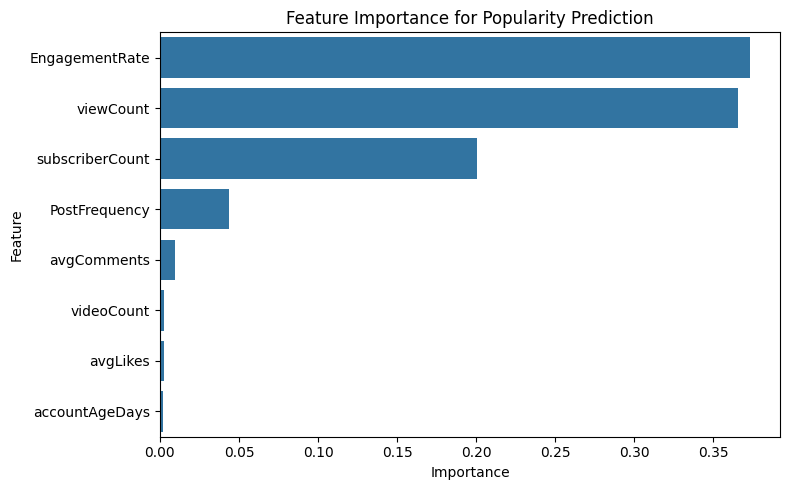

In [30]:
# 6️⃣ Feature Importance
# ==============================
importances = best_gbr.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance for Popularity Prediction")
plt.tight_layout()
plt.show()

C:\Users\Kavya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(



🏆 Top 10 Influencers by Predicted Popularity:

                                   title  subscriberCount   viewCount  \
1289                               J.W.X           6290.0     62141.0   
1079               Telugu Business Talks          23100.0   3211674.0   
1290                      The Tee Family          31300.0  59814775.0   
2883                        Easy Trading         167000.0  27401090.0   
2951      Ujjwal D Gadhvi Finance & Tech          53300.0  15353013.0   
2976               Telugu Business Talks          23200.0   3239360.0   
1754  Aryan Aquatic and Exotic Pet World           5150.0     95254.0   
1294                     warmSunshine456           5060.0   2998400.0   
856                        Food Blogger            5030.0   1524676.0   
4276                     warmSunshine456           5060.0   2998403.0   

      PredictedPopularity  
1289             9.788838  
1079             9.788838  
1290             9.785826  
2883             9.785826  
2951    

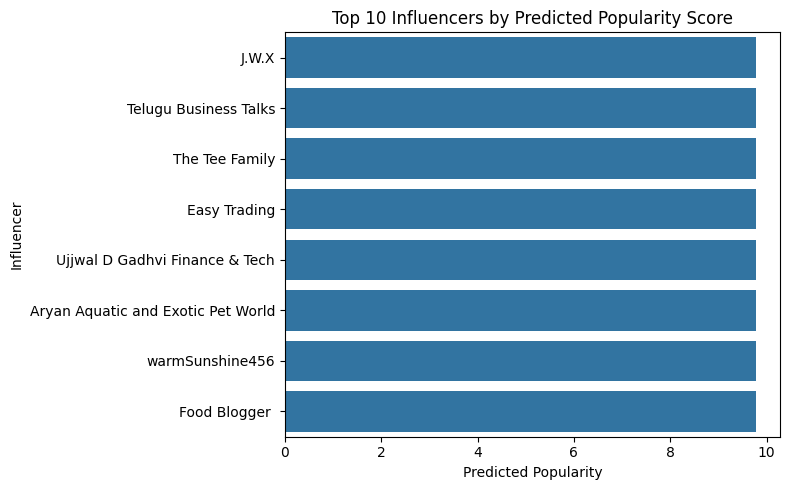

In [31]:
#Predict and Rank Influencers
# ==============================
data['PredictedPopularity'] = best_gbr.predict(X)
top_popular = data.sort_values('PredictedPopularity', ascending=False).head(10)

print("\n🏆 Top 10 Influencers by Predicted Popularity:\n")
print(top_popular[['title', 'subscriberCount', 'viewCount', 'PredictedPopularity']])

plt.figure(figsize=(8,5))
sns.barplot(x='PredictedPopularity', y='title', data=top_popular)
plt.title('Top 10 Influencers by Predicted Popularity Score')
plt.xlabel('Predicted Popularity')
plt.ylabel('Influencer')
plt.tight_layout()
plt.show()

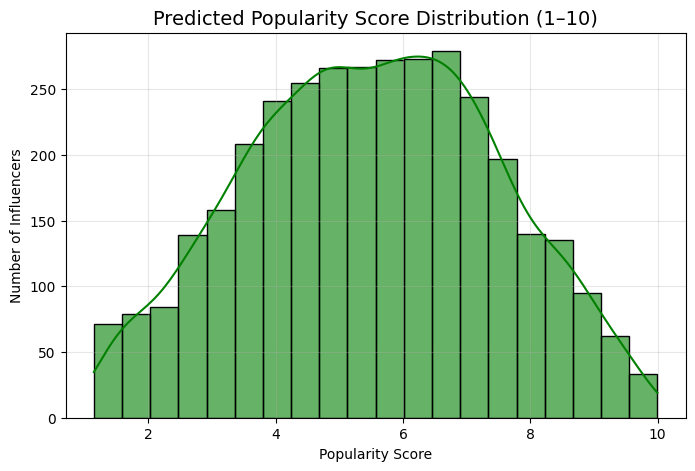

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(data["popularity_score"], bins=20, kde=True, color="green", alpha=0.6)
plt.title("Predicted Popularity Score Distribution (1–10)", fontsize=14)
plt.xlabel("Popularity Score")
plt.ylabel("Number of Influencers")
plt.grid(alpha=0.3)
plt.show()


In [33]:
import pickle

# Save the final tuned model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_gbr, f)

# Save the scaler (if you used one earlier)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save feature names
with open("model_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("✅ Model, scaler, and features saved successfully!")


✅ Model, scaler, and features saved successfully!
